In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("data_csv\\2017_05_18.csv")

In [24]:
data.head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,RUNNING,28,20.971098,28,2017-05-18T11:57:31,52.264481,False,11
1,RUNNING,22,21.084555,22,2017-05-18T11:57:32,52.244629,False,1
2,RUNNING,22,20.977781,22,2017-05-18T11:57:02,52.262615,False,8
3,RUNNING,4,21.012976,4,2017-05-18T11:57:31,52.311100,False,7
4,RUNNING,35,21.024283,35,2017-05-18T11:57:37,52.196407,False,8


In [41]:
data17 = data[data.FirstLine==17]

In [42]:
data17Lon = data17[np.abs(data17.Lon-data17.Lon.mean())<3*data17.Lon.std()]
data17LonLat = data17Lon[np.abs(data17Lon.Lat-data17Lon.Lat.mean())<3*data17Lon.Lat.std()]

In [43]:
data17LonLat.head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
79,RUNNING,17,21.004986,17,2017-05-18T11:57:40,52.220673,True,34
84,RUNNING,17,21.003632,17,2017-05-18T11:57:40,52.188686,True,32
97,RUNNING,17,21.007894,17,2017-05-18T11:57:39,52.208466,True,40
113,RUNNING,17,20.977528,"17,18",2017-05-18T11:57:40,52.265800,True,14
118,RUNNING,17,21.020071,"17,18",2017-05-18T11:57:39,52.266563,True,5


In [44]:
print(min(data17LonLat.Lon),max(data17LonLat.Lon))
print(min(data17LonLat.Lat),max(data17LonLat.Lat))

20.9340782 21.2942829
52.186821 52.3245163


In [45]:
interpolatedX = np.linspace(min(data17LonLat.Lon), max(data17LonLat.Lon), 250)
interpolatedY = np.interp(interpolatedX,data17LonLat.Lon,data17LonLat.Lat)

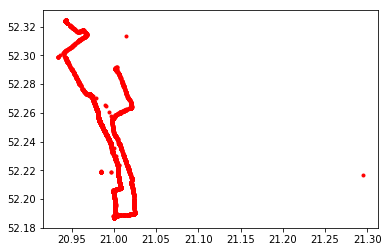

In [46]:
plt.plot( data17LonLat.Lon,data17LonLat.Lat, 'r.')
plt.show()

In [47]:
lines=[1,2, 3, 4, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 31, 33, 35, 44]

In [56]:
arrayWithData = list()
for line in lines:
    dataTemp = data[data.FirstLine==line]
    dataTempLon = dataTemp[np.abs(dataTemp.Lon-dataTemp.Lon.mean())<3*dataTemp.Lon.std()]
    dataTempLonLat = dataTempLon[np.abs(dataTempLon.Lat-dataTempLon.Lat.mean())<3*dataTempLon.Lat.std()]
    arrayWithData.append(dataTempLonLat)

In [68]:
arrayWithBrigades = list()
for line in arrayWithData:
    arrayWithBrigades.append(line.Brigade.unique())

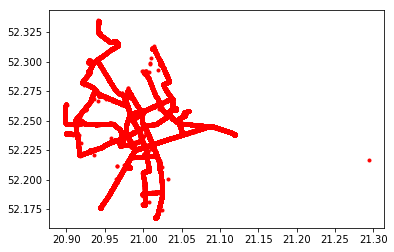

In [59]:
for oneLine in arrayWithData:
    plt.plot( oneLine.Lon,oneLine.Lat, 'r.')

plt.show()

In [71]:
brigade0line0=arrayWithData[0][arrayWithData[0].Brigade == arrayWithBrigades[0][0]]

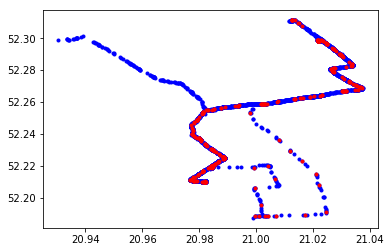

In [73]:
plt.plot(arrayWithData[0].Lon,arrayWithData[0].Lat,'b.')
plt.plot( brigade0line0.Lon,brigade0line0.Lat, 'r.')
plt.show()